### Check that fields from CPL hist file match those from MOM6

In [1]:
%matplotlib inline

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from mom6_tools.MOM6grid import MOM6grid
from mom6_tools.m6plot import xyplot

Basemap module not found. Some regional plots may not function properly


In [2]:
path= '/glade/scratch/gmarques/bmom.e22.f09_t061_hycom1_N75.mct.surface_fluxes_check.002/run/'
grd = MOM6grid(path+'ocean.mom6.static.nc')

MOM6 grid successfully loaded... 



In [3]:
### from log files
### cpl table says -0.55603990 W / m^2
## MOM reported the following:
heat = (1.9801338897026281E+25-1.9799489234574726E+25) / (grd.area_t.sum() * 3600. * 24 * 365.)
print(heat)

0.11599687277165135


In [4]:
# 002, from cpl table: -0.19020800 W / m^2

heat = (1.9803121536462631E+25-1.9799489234574726E+25) / (grd.area_t.sum() * 3600. * 24 * 365.)
print(heat)

0.2277905677358774


2.38697203078949


### MOM6 data

In [18]:
#ds_mom =  xr.open_dataset(path+'ocean.mom6.snap_0001.nc')
sfc_mom =  xr.open_dataset(path+'ocean.mom6.sfc_0002.nc')
frc_mom =  xr.open_dataset(path+'ocean.mom6.frc_0001.nc').squeeze()

In [19]:
net_heat_surface = np.ma.masked_invalid(frc_mom.net_heat_surface.values)
net_heat_cpl1 = np.ma.masked_invalid(frc_mom.net_heat_coupler.values)
sen_mom = np.ma.masked_invalid(frc_mom.sensible.values)
lat_mom = np.ma.masked_invalid(frc_mom.latent.values)
sw_mom = np.ma.masked_invalid(frc_mom.SW.values)
lw_mom = np.ma.masked_invalid(frc_mom.LW.values)
melth_mom = np.ma.masked_invalid(frc_mom.seaice_melt_heat.values)
net_heat_cpl2 = sen_mom + lat_mom + sw_mom + lw_mom + melth_mom
frazil_mom = np.ma.masked_invalid(frc_mom.frazil.values)

heat_content_lrunoff = np.ma.masked_invalid(frc_mom.heat_content_lrunoff.values)
heat_content_frunoff = np.ma.masked_invalid(frc_mom.heat_content_frunoff.values)
heat_content_icemelt = np.ma.masked_invalid(frc_mom.heat_content_icemelt.values)
heat_content_lprec = np.ma.masked_invalid(frc_mom.heat_content_lprec.values)
heat_content_fprec = np.ma.masked_invalid(frc_mom.heat_content_fprec.values)
heat_content_cond = np.ma.masked_invalid(frc_mom.heat_content_cond.values)
heat_content_massout = np.ma.masked_invalid(frc_mom.heat_content_massout.values)
heat_content_massin = np.ma.masked_invalid(frc_mom.heat_content_massin.values)
heat_content_surfwater = np.ma.masked_invalid(frc_mom.heat_content_surfwater.values)
heat_pme_mom = np.ma.masked_invalid(frc_mom.Heat_PmE.values)
#sst_mom = np.ma.masked_invalid(sfc_mom.SST[n,:].values)
#sss_mom = np.ma.masked_invalid(sfc_mom.SSS[n,:].values)

In [39]:
ds_cpl = xr.open_dataset(path+'cpl.hi.avg.nc')

In [40]:
ds_cpl

<xarray.Dataset>
Dimensions:                        (a2x_nx: 288, a2x_ny: 192, doma_nx: 288, doma_ny: 192, domg_nx: 416, domg_ny: 704, domi_nx: 540, domi_ny: 458, doml_nx: 288, doml_ny: 192, domo_nx: 540, domo_ny: 458, domr_nx: 720, domr_ny: 360, fraca_nx: 288, fraca_ny: 192, fracg_nx: 416, fracg_ny: 704, fraci_nx: 540, fraci_ny: 458, fracl_nx: 288, fracl_ny: 192, fraco_nx: 540, fraco_ny: 458, fracr_nx: 720, fracr_ny: 360, g2x_nx: 416, g2x_ny: 704, i2x_nx: 540, i2x_ny: 458, l2x_nx: 288, l2x_ny: 192, o2x_nx: 540, o2x_ny: 458, o2xa_nx: 288, o2xa_ny: 192, r2x_nx: 720, r2x_ny: 360, r2xo_nx: 540, r2xo_ny: 458, time: 1, x2a_nx: 288, x2a_ny: 192, x2g_nx: 416, x2g_ny: 704, x2i_nx: 540, x2i_ny: 458, x2l_nx: 288, x2l_ny: 192, x2oacc_nx: 540, x2oacc_ny: 458, x2r_nx: 720, x2r_ny: 360, xaoa_nx: 288, xaoa_ny: 192, xaoo_nx: 540, xaoo_ny: 458)
Coordinates:
  * time                           (time) object 0001-07-02 12:00:00
Dimensions without coordinates: a2x_nx, a2x_ny, doma_nx, doma_ny, domg_nx, domg_ny, domi_nx, domi_ny, doml_nx, doml_ny, domo_nx, domo_ny, domr_nx, domr_ny, fraca_nx, fraca_ny, fracg_nx, fracg_ny, fraci_nx, fraci_ny, fracl_nx, fracl_ny, fraco_nx, fraco_ny, fracr_nx, fracr_ny, g2x_nx, g2x_ny, i2x_nx, i2x_ny, l2x_nx, l2x_ny, o2x_nx, o2x_ny, o2xa_nx, o2xa_ny, r2x_nx, r2x_ny, r2xo_nx, r2xo_ny, x2a_nx, x2a_ny, x2g_nx, x2g_ny, x2i_nx, x2i_ny, x2l_nx, x2l_ny, x2oacc_nx, x2oacc_ny, x2r_nx, x2r_ny, xaoa_nx, xaoa_ny, xaoo_nx, xaoo_ny
Data variables:
    doma_lat                       (time, doma_ny, doma_nx) float64 ...
    doma_lon                       (time, doma_ny, doma_nx) float64 ...
    doma_area                      (time, doma_ny, doma_nx) float64 ...
    doma_aream                     (time, doma_ny, doma_nx) float64 ...
    doma_mask                      (time, doma_ny, doma_nx) float64 ...
    doma_frac                      (time, doma_ny, doma_nx) float64 ...
    fraca_afrac                    (time, fraca_ny, fraca_nx) float64 ...
    fraca_ifrac                    (time, fraca_ny, fraca_nx) float64 ...
    fraca_ofrac                    (time, fraca_ny, fraca_nx) float64 ...
    fraca_lfrac                    (time, fraca_ny, fraca_nx) float64 ...
    fraca_lfrin                    (time, fraca_ny, fraca_nx) float64 ...
    x2a_Sf_lfrac                   (time, x2a_ny, x2a_nx) float64 ...
    x2a_Sf_ifrac                   (time, x2a_ny, x2a_nx) float64 ...
    x2a_Sf_ofrac                   (time, x2a_ny, x2a_nx) float64 ...
    x2a_Sx_avsdr                   (time, x2a_ny, x2a_nx) float64 ...
    x2a_Sx_anidr                   (time, x2a_ny, x2a_nx) float64 ...
    x2a_Sx_avsdf                   (time, x2a_ny, x2a_nx) float64 ...
    x2a_Sx_anidf                   (time, x2a_ny, x2a_nx) float64 ...
    x2a_Sx_tref                    (time, x2a_ny, x2a_nx) float64 ...
    x2a_Sx_qref                    (time, x2a_ny, x2a_nx) float64 ...
    x2a_So_t                       (time, x2a_ny, x2a_nx) float64 ...
    x2a_Sx_t                       (time, x2a_ny, x2a_nx) float64 ...
    x2a_Sl_fv                      (time, x2a_ny, x2a_nx) float64 ...
    x2a_Sl_ram1                    (time, x2a_ny, x2a_nx) float64 ...
    x2a_Sl_snowh                   (time, x2a_ny, x2a_nx) float64 ...
    x2a_Si_snowh                   (time, x2a_ny, x2a_nx) float64 ...
    x2a_So_ssq                     (time, x2a_ny, x2a_nx) float64 ...
    x2a_So_re                      (time, x2a_ny, x2a_nx) float64 ...
    x2a_Sx_u10                     (time, x2a_ny, x2a_nx) float64 ...
    x2a_So_ustar                   (time, x2a_ny, x2a_nx) float64 ...
    x2a_Sl_dd001                   (time, x2a_ny, x2a_nx) float64 ...
    x2a_Sl_dd002                   (time, x2a_ny, x2a_nx) float64 ...
    x2a_Sl_dd003                   (time, x2a_ny, x2a_nx) float64 ...
    x2a_Sl_dd004                   (time, x2a_ny, x2a_nx) float64 ...
    x2a_Faxx_taux                  (time, x2a_ny, x2a_nx) float64 ...
    x2a_Faxx_tauy                  (time, x2a_ny, x

In [33]:
C_P = 3992.0 
latent_heat_fusion = 3.337E+05
latent_heat_vapor = 2.501E+06

In [41]:
n=0
# areas
domo_aream = np.ma.masked_invalid(ds_cpl.domo_aream[n,:].values)
domo_area = np.ma.masked_invalid(ds_cpl.domo_area[n,:].values)
norm = domo_aream/domo_area

# heat
lwdn_cpl= np.ma.masked_invalid(ds_cpl.x2oacc_Faxa_lwdn[n,:].values) * norm
sw_cpl  = np.ma.masked_invalid(ds_cpl.x2oacc_Foxx_swnet[n,:].values)* norm
lat_cpl = np.ma.masked_invalid(ds_cpl.x2oacc_Foxx_lat[n,:].values)* norm
sen_cpl = np.ma.masked_invalid(ds_cpl.x2oacc_Foxx_sen[n,:].values)* norm
lwup_cpl= np.ma.masked_invalid(ds_cpl.x2oacc_Foxx_lwup[n,:].values)* norm
melth_cpl=np.ma.masked_invalid(ds_cpl.x2oacc_Fioi_melth[n,:].values)* norm
net_heat_coupler_cpl = lwdn_cpl+sw_cpl+lat_cpl+lwup_cpl+melth_cpl + sen_cpl

# mass
rofi = np.ma.masked_invalid(ds_cpl.x2oacc_Foxx_rofi[n,:].values)* norm
snow = np.ma.masked_invalid(ds_cpl.x2oacc_Faxa_snow[n,:].values)* norm
evap = np.ma.masked_invalid(ds_cpl.x2oacc_Foxx_evap[n,:].values)* norm
meltw = np.ma.masked_invalid(ds_cpl.x2oacc_Fioi_meltw[n,:].values)* norm
rain = np.ma.masked_invalid(ds_cpl.x2oacc_Faxa_rain[n,:].values)* norm
rofl = np.ma.masked_invalid(ds_cpl.x2oacc_Foxx_rofl[n,:].values)* norm

# o2x
sst_cpl = np.ma.masked_invalid(ds_cpl.o2x_So_t[n,:].values) - 273.15
sss_cpl = np.ma.masked_invalid(ds_cpl.o2x_So_s[n,:].values) 

### Net heat coupler
net_heat_cpl = sen_mom + lat_mom + sw_mom + lw_mom + melth_mom

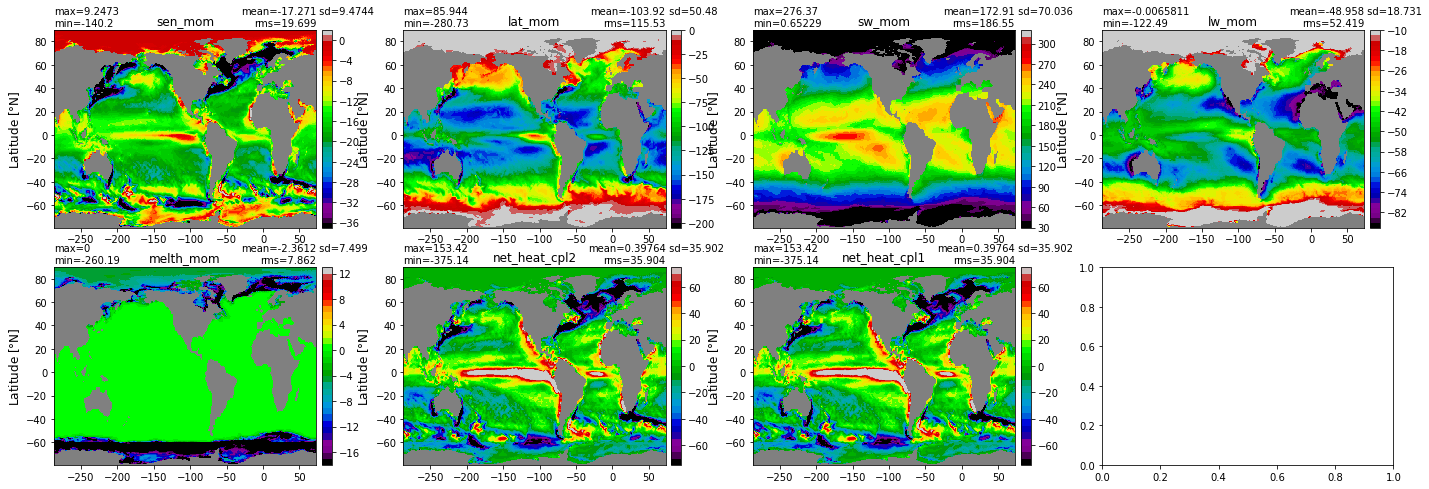

In [43]:
%matplotlib inline
nbins = 50
cmap = plt.cm.nipy_spectral
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(24,8))
ax1 = ax.flatten()
variables = ['sen_mom','lat_mom','sw_mom','lw_mom','melth_mom','net_heat_cpl2',
             'net_heat_cpl1']
for i in range(len(variables)):
  dummy = eval(variables[i])
  xyplot(dummy, grd.geolon, grd.geolat, grd.area_t, title=str(variables[i]), axis=ax1[i], nbins=nbins, colormap=cmap)
  ax1[i].set_xlabel('')

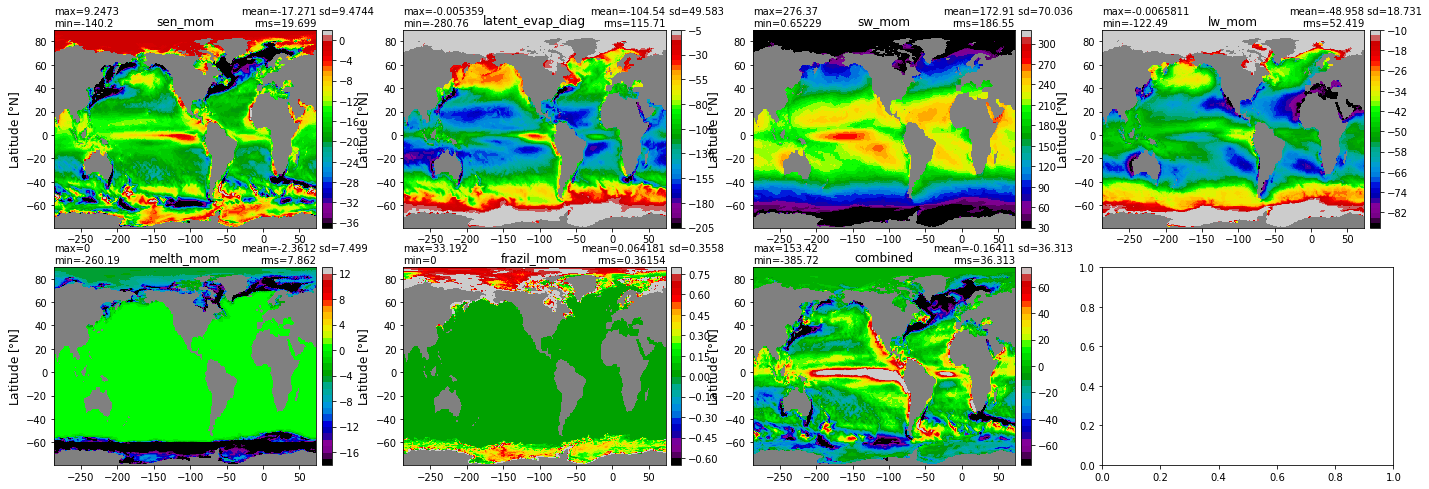

In [44]:
%matplotlib inline
nbins = 50
cmap = plt.cm.nipy_spectral
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(24,8))
ax1 = ax.flatten()
latent_heat_vapor = 2.501E+06
latent_evap_diag = np.ma.masked_invalid(frc_mom.evap.values) * latent_heat_vapor
combined = sen_mom + latent_evap_diag + sw_mom + lw_mom + melth_mom + frazil_mom
variables = ['sen_mom','latent_evap_diag','sw_mom','lw_mom','melth_mom','frazil_mom','combined']
for i in range(len(variables)):
  dummy = eval(variables[i])
  xyplot(dummy, grd.geolon, grd.geolat, grd.area_t, title=str(variables[i]), axis=ax1[i], nbins=nbins, colormap=cmap)
  ax1[i].set_xlabel('')

### Heat due to mass in and out of the ocean
Alternative means to compute to heat_PmE via heat_content_massin and heat_content_massout, where heat_PmE = heat_content_massin + heat_content_massout

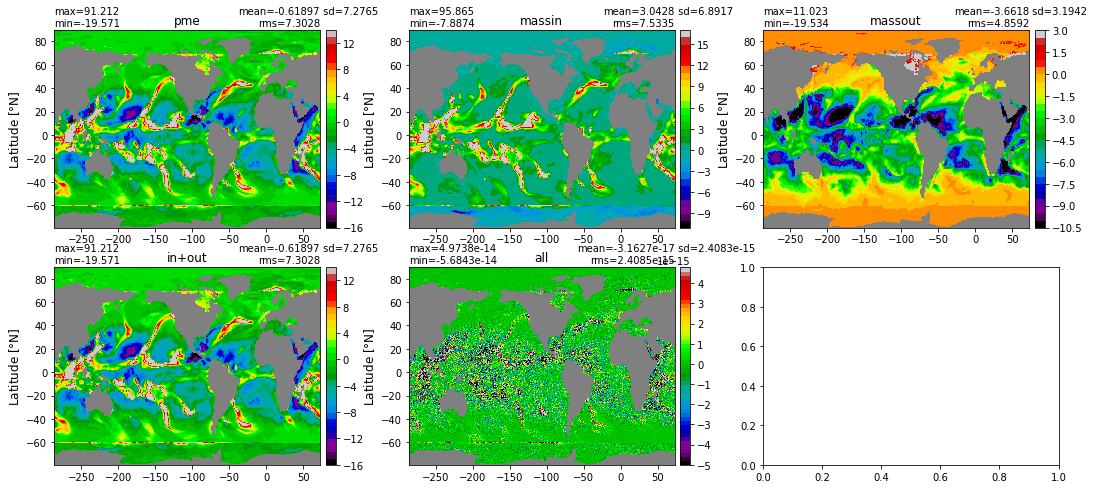

In [41]:
%matplotlib inline
nbins = 50
cmap = plt.cm.nipy_spectral
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(18,8))
ax1 = ax.flatten()
variables = ['heat_pme_mom','heat_content_massin','heat_content_massout','heat_content_massin + heat_content_massout',
            'heat_content_massout + heat_content_massin - heat_pme_mom']
labels = ['pme','massin','massout','in+out','all']
for i in range(len(variables)):
  dummy = eval(variables[i])
  xyplot(dummy, grd.geolon, grd.geolat, grd.area_t, axis=ax1[i], nbins=nbins, colormap=cmap, title=labels[i])
  ax1[i].set_xlabel('')

### Break heat mass in and out by compoments
heat_content_massin + heat_content_massout = heat_content_lrunoff + heat_content_frunoff + heat_content_lprec +  heat_content_fprec + heat_content_icemelt + heat_content_cond

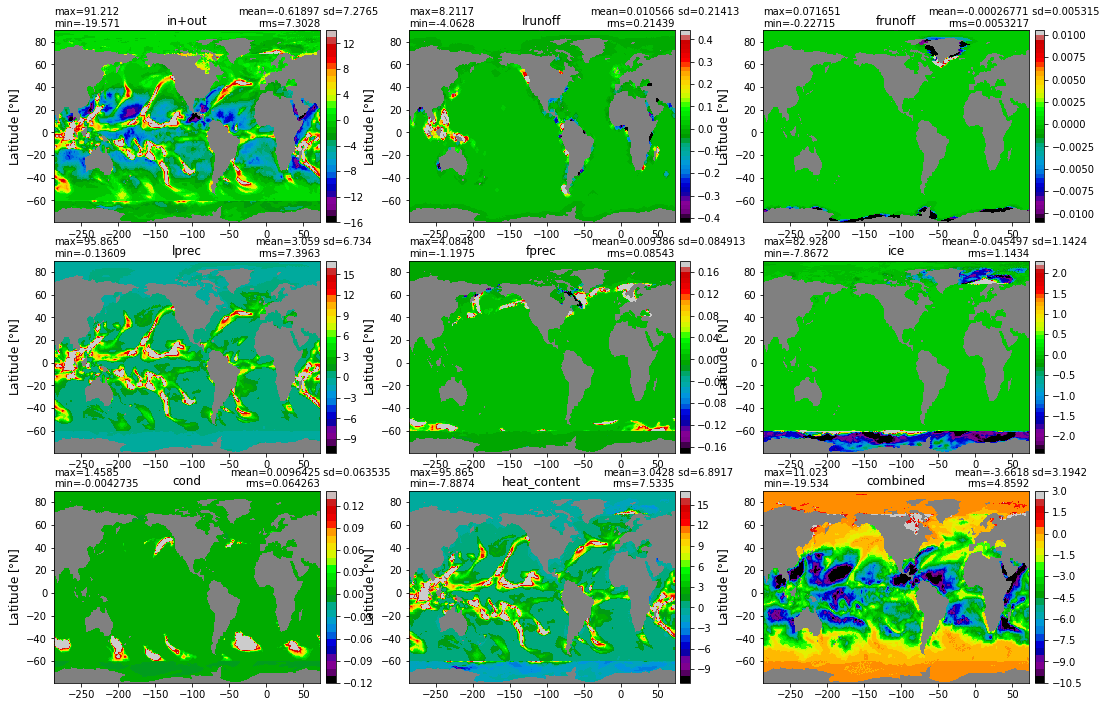

In [47]:
%matplotlib inline
nbins = 50
cmap = plt.cm.nipy_spectral
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(18,12))
ax1 = ax.flatten()
heat_content = heat_content_lrunoff + heat_content_frunoff + heat_content_lprec + \
        heat_content_fprec + heat_content_icemelt + heat_content_cond

combined = heat_content_massin + heat_content_massout - heat_content
variables = ['heat_content_massin + heat_content_massout','heat_content_lrunoff','heat_content_frunoff','heat_content_lprec',
            'heat_content_fprec','heat_content_icemelt','heat_content_cond','heat_content','combined']
labels = ['in+out','lrunoff','frunoff','lprec','fprec','ice','cond','heat_content','combined']
for i in range(len(variables)):
  dummy = eval(variables[i])
  xyplot(dummy, grd.geolon, grd.geolat, grd.area_t, axis=ax1[i], nbins=nbins, colormap=cmap, title=labels[i])
  ax1[i].set_xlabel('')

### Net heat surface
net_heat_surface = heat_pme + frazil + net_heat_coupler 

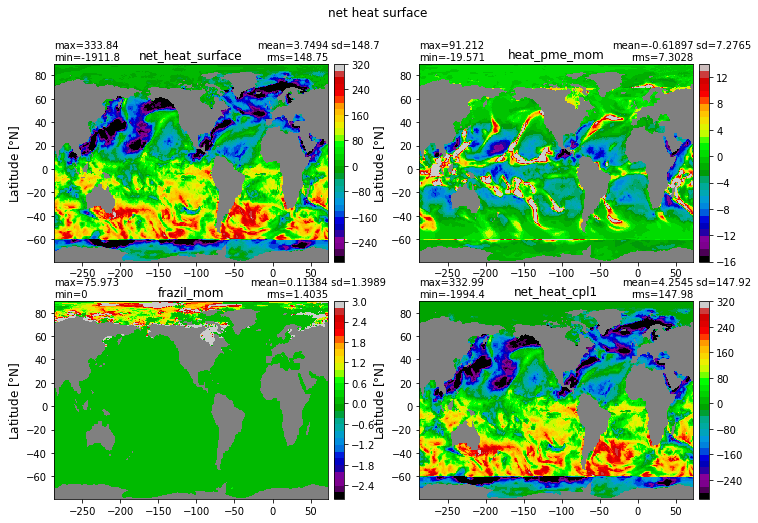

In [32]:
%matplotlib inline
nbins = 50
cmap = plt.cm.nipy_spectral
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
ax1 = ax.flatten()
plt.suptitle('net heat surface')
variables = ['net_heat_surface','heat_pme_mom','frazil_mom','net_heat_cpl1']
for i in range(len(variables)):
  dummy = eval(variables[i])
  xyplot(dummy, grd.geolon, grd.geolat, grd.area_t, title=str(variables[i]), axis=ax1[i], nbins=nbins, colormap=cmap)
  ax1[i].set_xlabel('')

In [9]:
C_P = 3992.0 
latent_heat_fusion = 3.337E+05
latent_heat_vapor = 2.501E+06

### SW

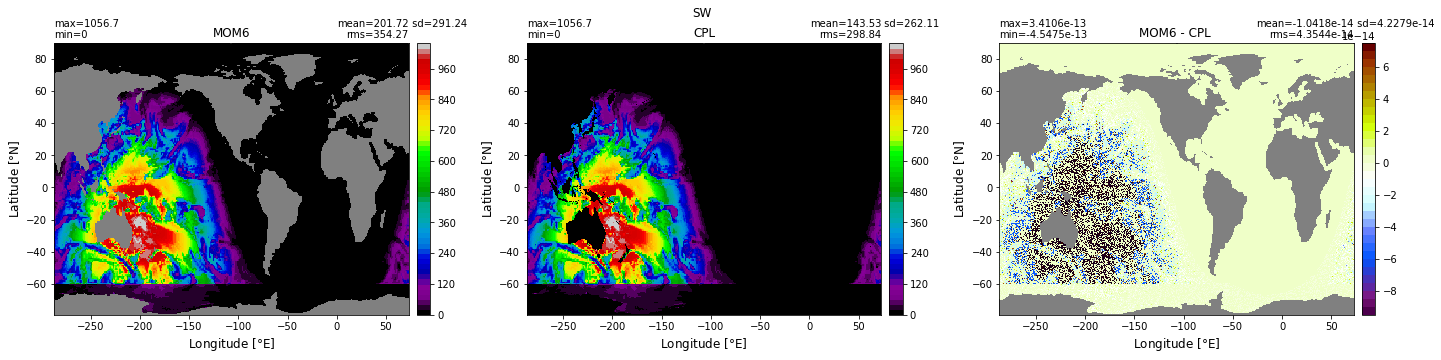

In [11]:
%matplotlib inline

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24,5))
ax1 = ax.flatten()
plt.suptitle('SW')
xyplot(sw_mom, grd.geolon, grd.geolat, grd.area_t, title='MOM6', 
       axis=ax1[0], nbins=100, colormap=plt.cm.nipy_spectral, clim=(0,1057))
xyplot(sw_cpl, grd.geolon, grd.geolat, grd.area_t, title='CPL', 
       axis=ax1[1], nbins=100, colormap=plt.cm.nipy_spectral, clim=(0,1057))
xyplot((sw_mom-sw_cpl), grd.geolon, grd.geolat, grd.area_t, title='MOM6 - CPL ', 
       axis=ax1[2])

### LW

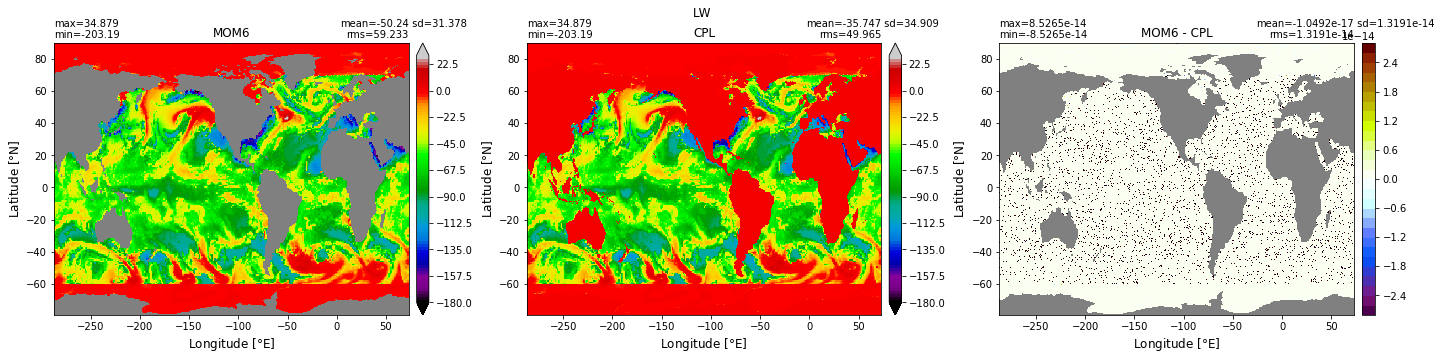

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24,5))
ax1 = ax.flatten()
plt.suptitle('LW')
xyplot(lw_mom, grd.geolon, grd.geolat, grd.area_t, title='MOM6', 
       axis=ax1[0], nbins=100, colormap=plt.cm.nipy_spectral, clim=(-180,30))
xyplot(lwdn_cpl+lwup_cpl, grd.geolon, grd.geolat, grd.area_t, title='CPL', 
       axis=ax1[1], nbins=100, colormap=plt.cm.nipy_spectral, clim=(-180,30))
xyplot((lw_mom-(lwdn_cpl+lwup_cpl)), grd.geolon, grd.geolat, grd.area_t, title='MOM6 - CPL', 
       axis=ax1[2])

### Sensible

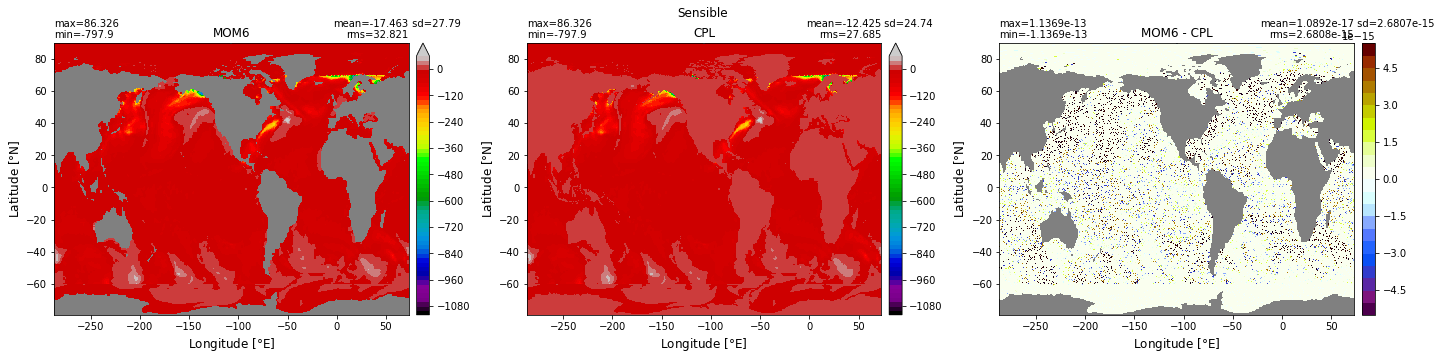

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24,5))
ax1 = ax.flatten()
plt.suptitle('Sensible')
xyplot(sen_mom, grd.geolon, grd.geolat, grd.area_t, title='MOM6', 
       axis=ax1[0], nbins=100, colormap=plt.cm.nipy_spectral, clim=(-1110,60))
xyplot(sen_cpl, grd.geolon, grd.geolat, grd.area_t, title='CPL', 
       axis=ax1[1], nbins=100, colormap=plt.cm.nipy_spectral, clim=(-1110,60))
xyplot((sen_mom-sen_cpl), grd.geolon, grd.geolat, grd.area_t, title='MOM6 - CPL', 
       axis=ax1[2])

### Latent
NOTE: 
* in MOM6, latent = (rofi * latent_heat_fusion) + (snow * latent_heat_fusion) + (evap * latent_heat_vapor)
* in CPL,  latent = evap * latent_heat_vapor

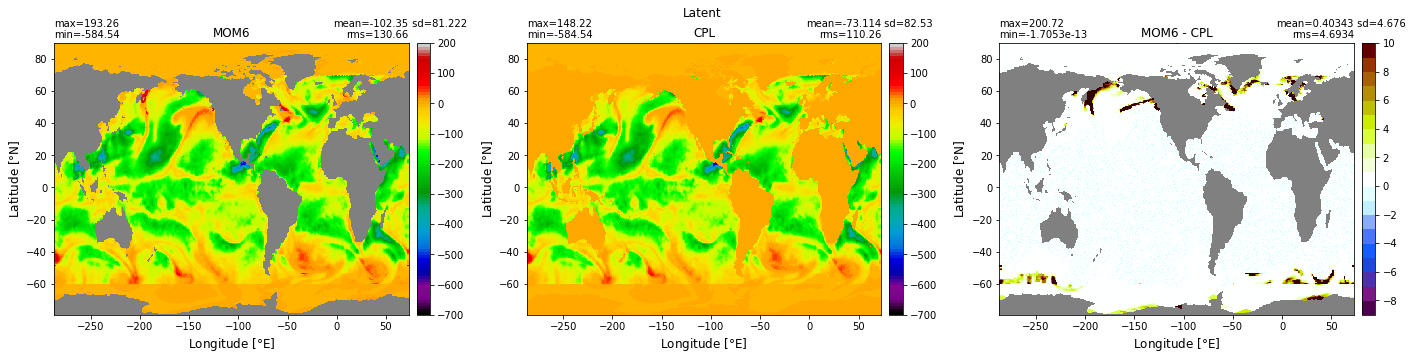

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24,5))
ax1 = ax.flatten()
plt.suptitle('Latent')
xyplot(lat_mom, grd.geolon, grd.geolat, grd.area_t, title='MOM6', 
       axis=ax1[0], nbins=100, colormap=plt.cm.nipy_spectral, clim=(-700,200))
xyplot(lat_cpl, grd.geolon, grd.geolat, grd.area_t, title='CPL', 
       axis=ax1[1], nbins=100, colormap=plt.cm.nipy_spectral, clim=(-700,200))
xyplot((lat_mom-lat_cpl), grd.geolon, grd.geolat, grd.area_t, 
       title='MOM6 - CPL', 
       axis=ax1[2])

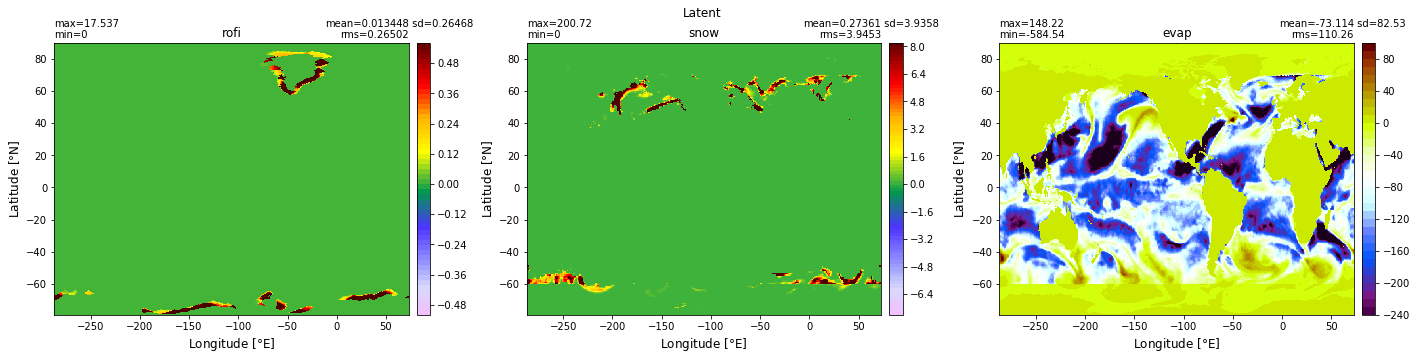

In [15]:
latent = (rofi * latent_heat_fusion) + (snow * latent_heat_fusion) + (evap * latent_heat_vapor)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24,5))
ax1 = ax.flatten()
plt.suptitle('Latent')
xyplot((rofi * latent_heat_fusion), grd.geolon, grd.geolat, grd.area_t, title='rofi', 
       axis=ax1[0], nbins=100)
xyplot((snow * latent_heat_fusion), grd.geolon, grd.geolat, grd.area_t, title='snow', 
       axis=ax1[1], nbins=100)
xyplot((evap * latent_heat_vapor), grd.geolon, grd.geolat, grd.area_t, title='evap', 
       axis=ax1[2])

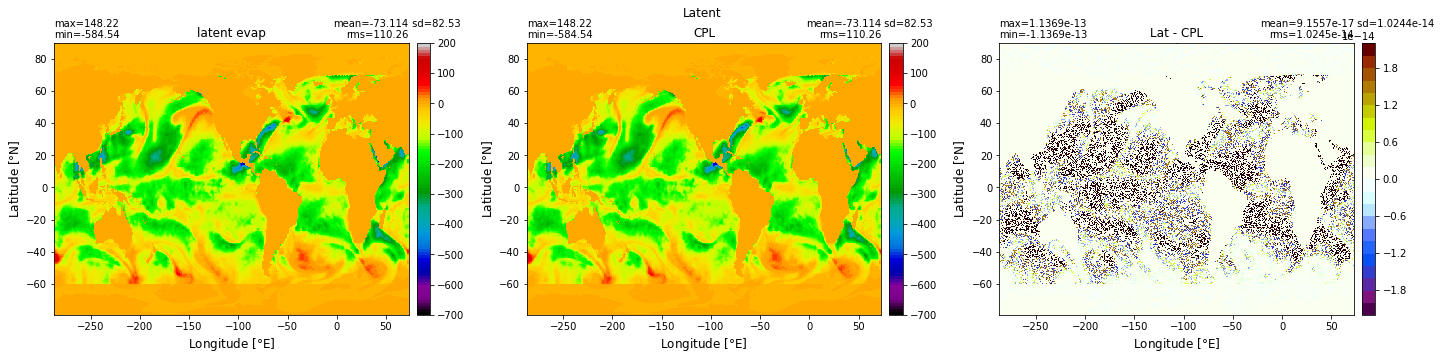

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24,5))
ax1 = ax.flatten()
plt.suptitle('Latent')
xyplot((evap * latent_heat_vapor), grd.geolon, grd.geolat, grd.area_t, title='latent evap', 
       axis=ax1[0], nbins=100, colormap=plt.cm.nipy_spectral, clim=(-700,200))
xyplot(lat_cpl, grd.geolon, grd.geolat, grd.area_t, title='CPL', 
       axis=ax1[1], nbins=100, colormap=plt.cm.nipy_spectral, clim=(-700,200))
xyplot(((evap * latent_heat_vapor)-lat_cpl), grd.geolon, grd.geolat, grd.area_t, title='Lat - CPL', 
       axis=ax1[2])

### seaice_melt_heat

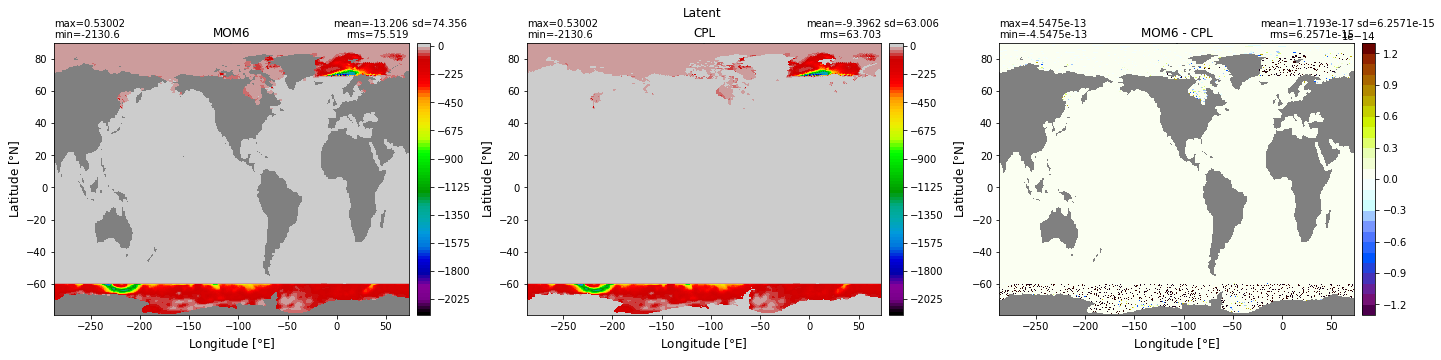

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24,5))
ax1 = ax.flatten()
plt.suptitle('Latent')
xyplot(melth_mom, grd.geolon, grd.geolat, grd.area_t, title='MOM6', 
       axis=ax1[0], nbins=100, colormap=plt.cm.nipy_spectral, clim=(-2130,0.5))
xyplot(melth_cpl, grd.geolon, grd.geolat, grd.area_t, title='CPL', 
       axis=ax1[1], nbins=100, colormap=plt.cm.nipy_spectral, clim=(-2130,0.5))
xyplot((melth_mom-melth_cpl), grd.geolon, grd.geolat, grd.area_t, title='MOM6 - CPL', 
       axis=ax1[2])

### Sensible heat content due to mass added/removed

Components:
* rofl
* rofi 
* snow 
* evap 
* meltw 
* rain 

### rofl
NOTE: why we have negative rofl?

4.5837386431552897e-08


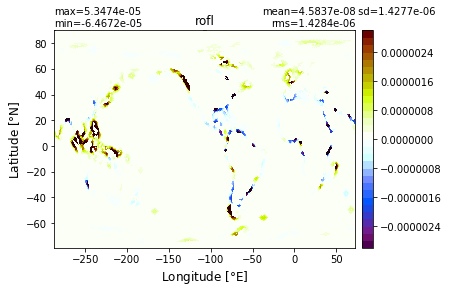

In [32]:
fig, ax = plt.subplots(nrows=1, ncols=1)
xyplot(rofl, grd.geolon, grd.geolat, grd.area_t, title='rofl', axis=ax)

0.004272744678564587


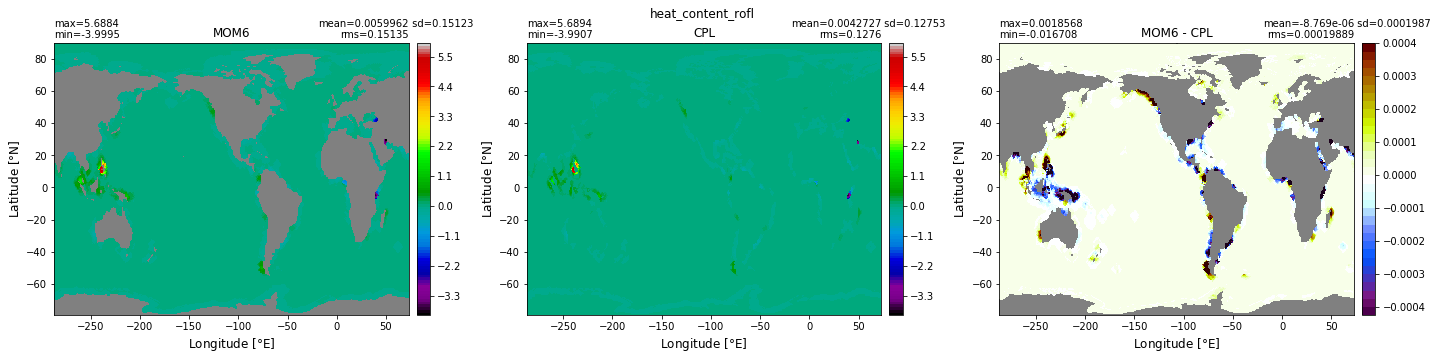

In [33]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24,5))
ax1 = ax.flatten()
heat_content_rofl = rofl * C_P * sst_cpl
plt.suptitle('heat_content_rofl')
xyplot(heat_content_lrunoff, grd.geolon, grd.geolat, grd.area_t, title='MOM6', 
       axis=ax1[0], nbins=100, colormap=plt.cm.nipy_spectral, clim=(-4,6))
xyplot(heat_content_rofl, grd.geolon, grd.geolat, grd.area_t, title='CPL', 
       axis=ax1[1], nbins=100, colormap=plt.cm.nipy_spectral, clim=(-4,6))
xyplot((heat_content_lrunoff-heat_content_rofl), grd.geolon, grd.geolat, grd.area_t, title='MOM6 - CPL', 
       axis=ax1[2])

heat_content_rofl_ave = (heat_content_rofl*grd.area_t).sum() / grd.area_t.sum()
print(heat_content_rofl_ave)

### rofi

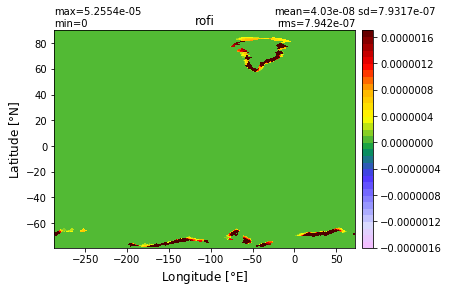

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=1)
xyplot(rofi, grd.geolon, grd.geolat, grd.area_t, title='rofi', axis=ax)

-0.3846696646173703


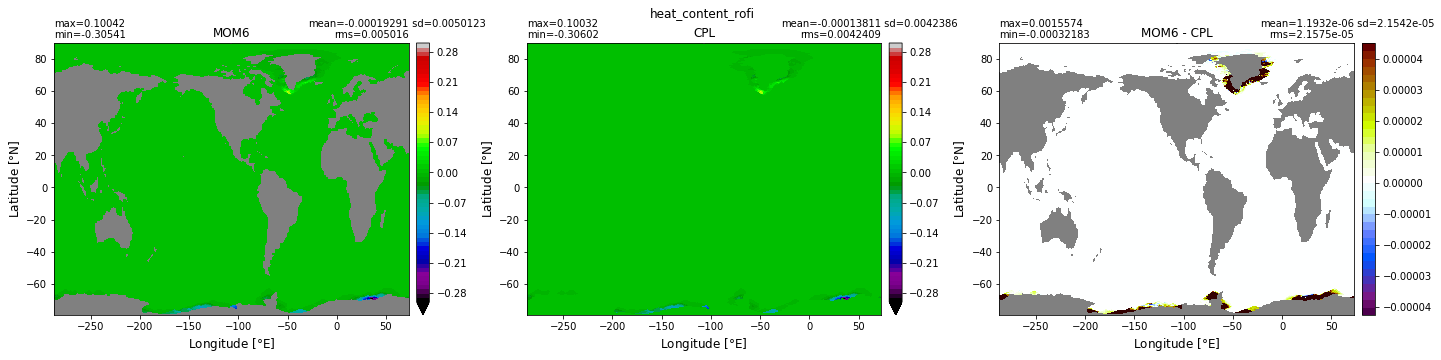

In [35]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24,5))
ax1 = ax.flatten()
heat_content_rofi = rofi * C_P * sst_cpl
plt.suptitle('heat_content_rofi')
xyplot(heat_content_frunoff, grd.geolon, grd.geolat, grd.area_t, title='MOM6', 
       axis=ax1[0], nbins=100, colormap=plt.cm.nipy_spectral, clim=(-0.3,0.3))
xyplot(heat_content_rofi, grd.geolon, grd.geolat, grd.area_t, title='CPL', 
       axis=ax1[1], nbins=100, colormap=plt.cm.nipy_spectral, clim=(-0.3,0.3))
xyplot((heat_content_frunoff-heat_content_rofi), grd.geolon, grd.geolat, grd.area_t, title='MOM6 - CPL', 
       axis=ax1[2])

heat_pme_mom_ave = (heat_pme_mom*grd.area_t).sum() / grd.area_t.sum()
print(heat_pme_mom_ave)

### snow

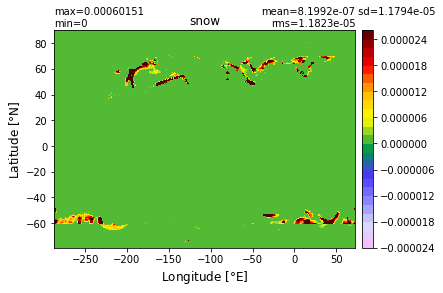

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=1)
xyplot(snow, grd.geolon, grd.geolat, grd.area_t, title='snow', axis=ax)

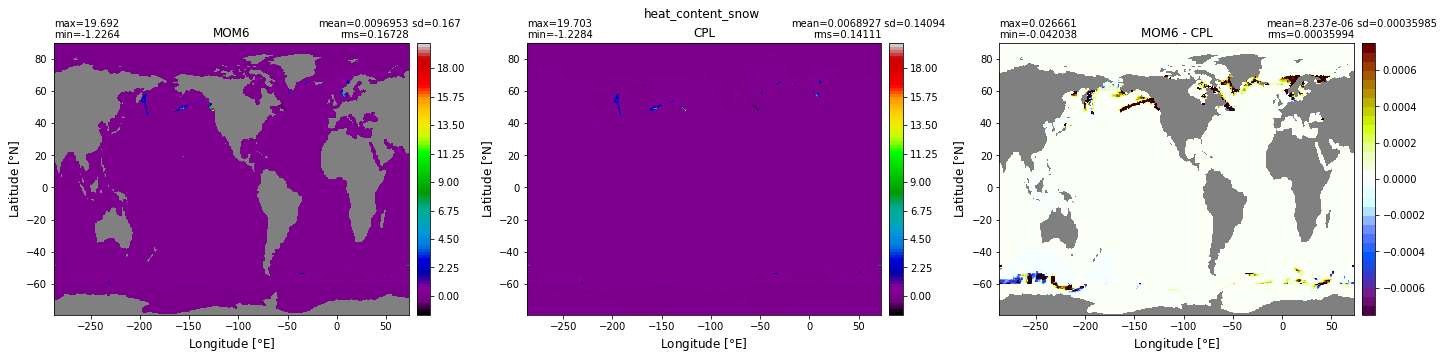

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24,5))
ax1 = ax.flatten()
heat_content_snow = snow * C_P * sst_cpl
plt.suptitle('heat_content_snow')
xyplot(heat_content_fprec, grd.geolon, grd.geolat, grd.area_t, title='MOM6', 
       axis=ax1[0], nbins=100, colormap=plt.cm.nipy_spectral, clim=(-1.5,20))
xyplot(heat_content_snow, grd.geolon, grd.geolat, grd.area_t, title='CPL', 
       axis=ax1[1], nbins=100, colormap=plt.cm.nipy_spectral, clim=(-1.5,20))
xyplot((heat_content_fprec-heat_content_snow), grd.geolon, grd.geolat, grd.area_t, title='MOM6 - CPL', 
       axis=ax1[2])

### Evap

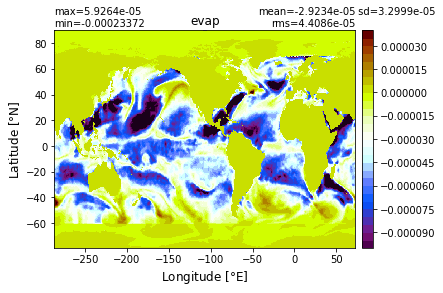

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=1)
xyplot(evap, grd.geolon, grd.geolat, grd.area_t, title='evap', axis=ax)

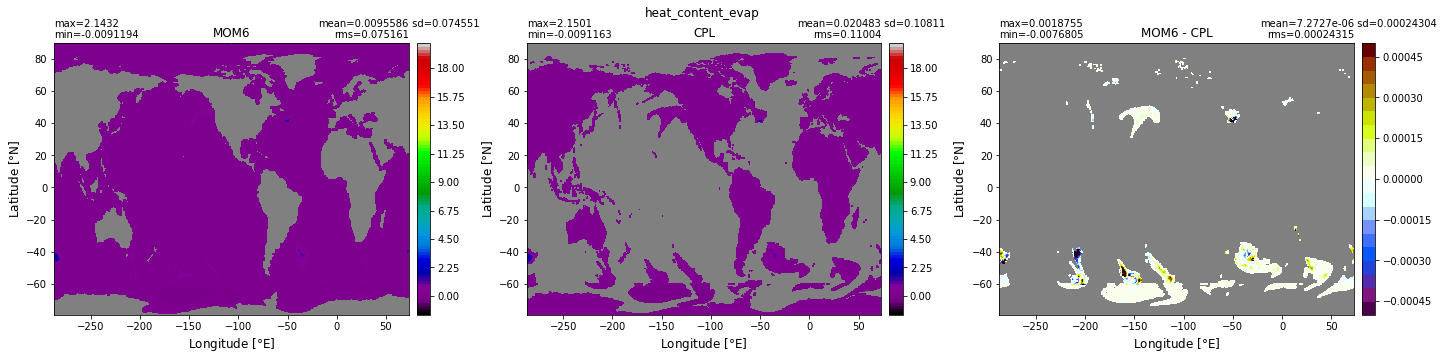

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24,5))
ax1 = ax.flatten()
dummy = evap * C_P * sst_cpl
heat_content_evap = np.ma.masked_where(evap<0, dummy)

plt.suptitle('heat_content_evap')
xyplot(heat_content_cond, grd.geolon, grd.geolat, grd.area_t, title='MOM6', 
       axis=ax1[0], nbins=100, colormap=plt.cm.nipy_spectral, clim=(-1.5,20))
xyplot(heat_content_evap, grd.geolon, grd.geolat, grd.area_t, title='CPL', 
       axis=ax1[1], nbins=100, colormap=plt.cm.nipy_spectral, clim=(-1.5,20))
xyplot((heat_content_cond-heat_content_evap), grd.geolon, grd.geolat, grd.area_t, title='MOM6 - CPL', 
       axis=ax1[2])

### meltw
NOTE: MOM6 is only accounting for meltw > 0

https://github.com/NOAA-GFDL/MOM6/blob/f3483beeea796087342aaa059d066bec899ed201/src/core/MOM_forcing_type.F90#L770

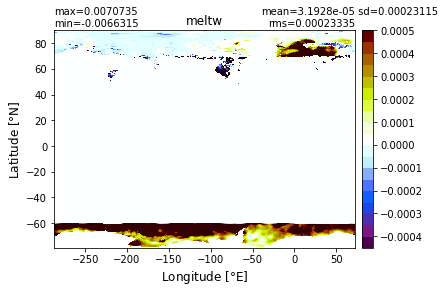

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=1)
xyplot(meltw, grd.geolon, grd.geolat, grd.area_t, title='meltw', axis=ax)

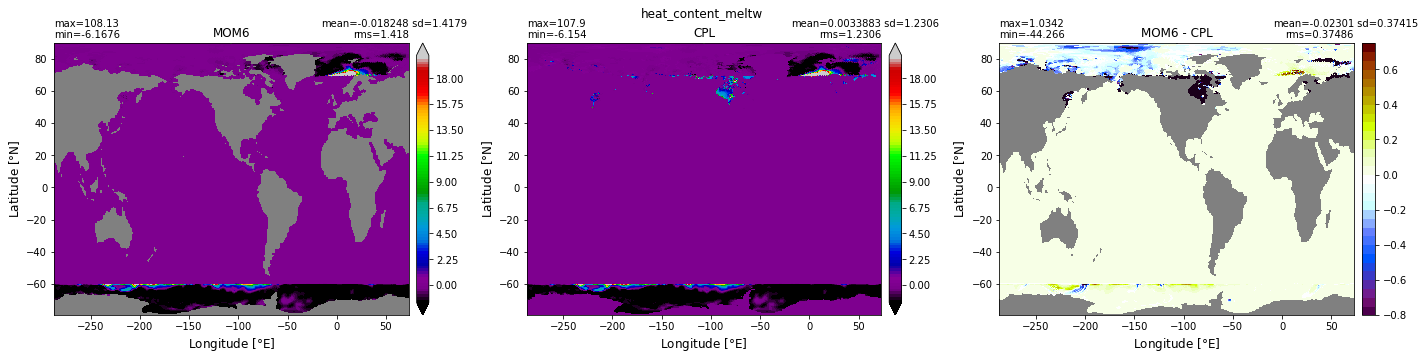

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24,5))
ax1 = ax.flatten()
heat_content_meltw = meltw * C_P * sst_cpl

plt.suptitle('heat_content_meltw')
xyplot(heat_content_icemelt, grd.geolon, grd.geolat, grd.area_t, title='MOM6', 
       axis=ax1[0], nbins=100, colormap=plt.cm.nipy_spectral, clim=(-1.5,20))
xyplot(heat_content_meltw, grd.geolon, grd.geolat, grd.area_t, title='CPL', 
       axis=ax1[1], nbins=100, colormap=plt.cm.nipy_spectral, clim=(-1.5,20))
xyplot((heat_content_icemelt-heat_content_meltw), grd.geolon, grd.geolat, grd.area_t, title='MOM6 - CPL', 
       axis=ax1[2])

### rain

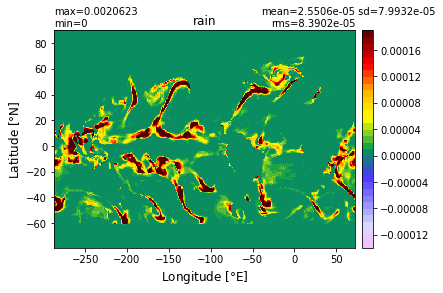

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=1)
xyplot(rain, grd.geolon, grd.geolat, grd.area_t, title='rain', axis=ax)

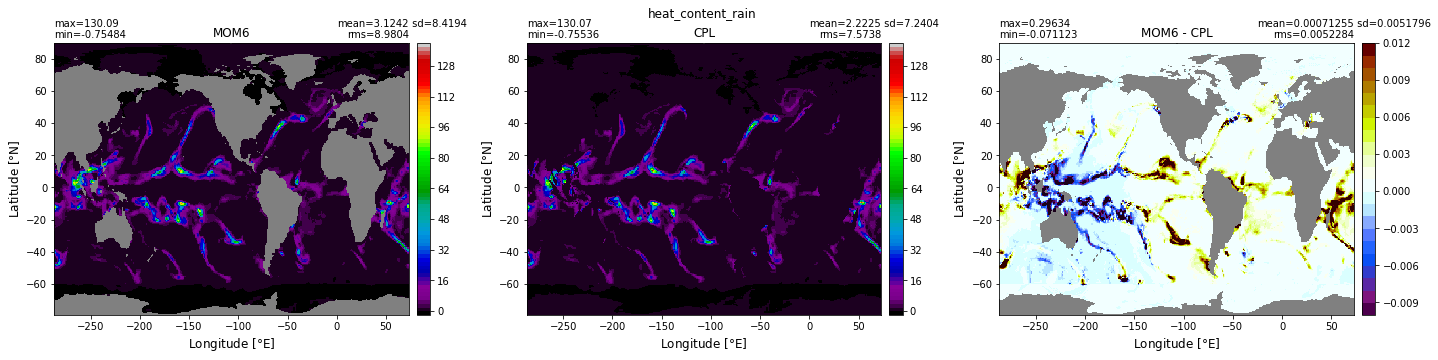

In [30]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24,5))
ax1 = ax.flatten()
heat_content_rain = rain * C_P * sst_cpl

plt.suptitle('heat_content_rain')
xyplot(heat_content_lprec, grd.geolon, grd.geolat, grd.area_t, title='MOM6', 
       axis=ax1[0], nbins=100, colormap=plt.cm.nipy_spectral, clim=(-1.5,140))
xyplot(heat_content_rain, grd.geolon, grd.geolat, grd.area_t, title='CPL', 
       axis=ax1[1], nbins=100, colormap=plt.cm.nipy_spectral, clim=(-1.5,140))
xyplot((heat_content_lprec-heat_content_rain), grd.geolon, grd.geolat, grd.area_t, title='MOM6 - CPL', 
       axis=ax1[2])

### Check net_heat_coupler 
net_heat_coupler = SW+LW+latent+sensible+seaice_melt_heat

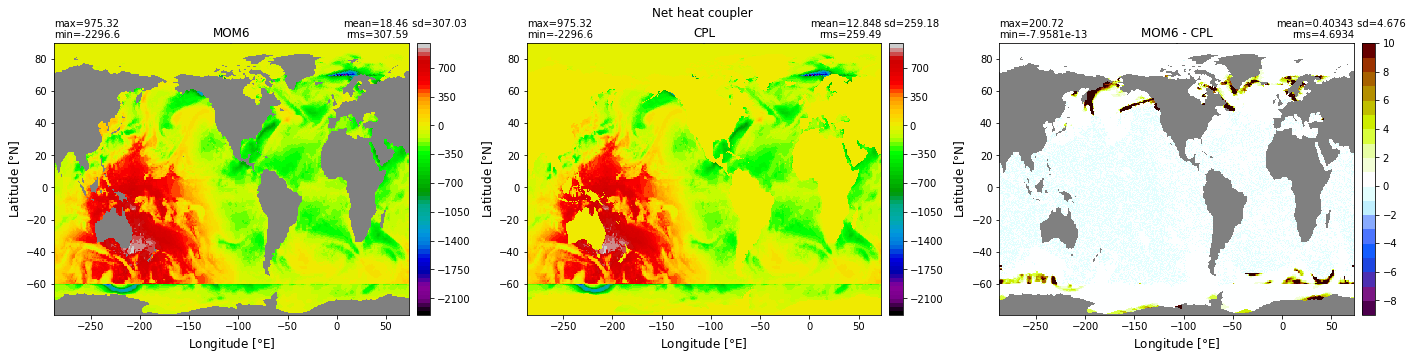

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24,5))
ax1 = ax.flatten()
plt.suptitle('Net heat coupler')
xyplot(net_heat_coupler_mom2, grd.geolon, grd.geolat, grd.area_t, title='MOM6', 
       axis=ax1[0], nbins=100, colormap=plt.cm.nipy_spectral, clim=(-2300,1000))
xyplot(net_heat_coupler_cpl, grd.geolon, grd.geolat, grd.area_t, title='CPL', 
       axis=ax1[1], nbins=100, colormap=plt.cm.nipy_spectral, clim=(-2300,1000))
xyplot((net_heat_coupler_mom2-net_heat_coupler_cpl), grd.geolon, grd.geolat, grd.area_t, 
       title='MOM6 - CPL', 
       axis=ax1[2])

Latent should be evap * latent_heat_vapor

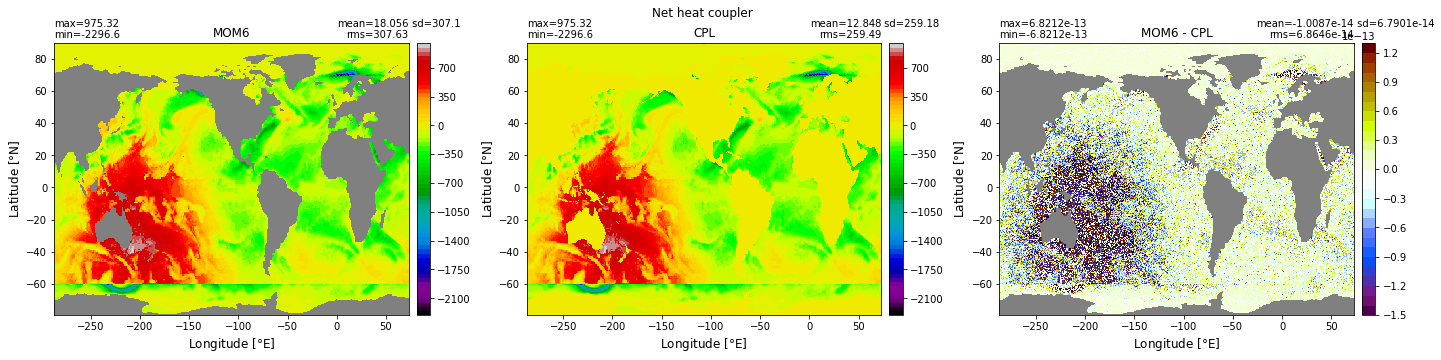

In [35]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24,5))
ax1 = ax.flatten()
plt.suptitle('Net heat coupler')
net_mom = sen_mom + sw_mom + lw_mom + melth_mom + (evap * latent_heat_vapor)
xyplot(net_mom, grd.geolon, grd.geolat, grd.area_t, title='MOM6', 
       axis=ax1[0], nbins=100, colormap=plt.cm.nipy_spectral, clim=(-2300,1000))
xyplot(net_heat_coupler_cpl, grd.geolon, grd.geolat, grd.area_t, title='CPL', 
       axis=ax1[1], nbins=100, colormap=plt.cm.nipy_spectral, clim=(-2300,1000))
xyplot((net_mom-net_heat_coupler_cpl), grd.geolon, grd.geolat, 
       grd.area_t, title='MOM6 - CPL', axis=ax1[2])

### self-consistency in MOM6

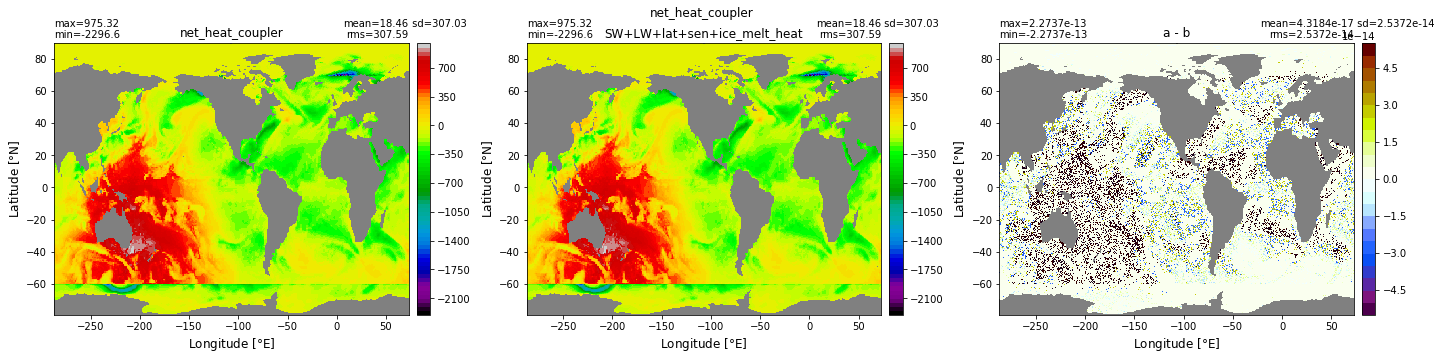

In [36]:

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24,5))
ax1 = ax.flatten()
plt.suptitle('net_heat_coupler')
xyplot(net_heat_coupler_mom1, grd.geolon, grd.geolat, grd.area_t, title='net_heat_coupler', 
       axis=ax1[0], nbins=100, colormap=plt.cm.nipy_spectral, clim=(-2300,1000))
xyplot(net_heat_coupler_mom2, grd.geolon, grd.geolat, grd.area_t, title='SW+LW+lat+sen+ice_melt_heat', 
       axis=ax1[1], nbins=100, colormap=plt.cm.nipy_spectral, clim=(-2300,1000))
xyplot((net_heat_coupler_mom1-net_heat_coupler_mom2), grd.geolon, grd.geolat, grd.area_t, title='a - b', 
       axis=ax1[2])

### net_heat_surface - net heat coupler (from cpl)

This should give the difference between what the CPL expects the ocean receive and what the ocean actually receives.

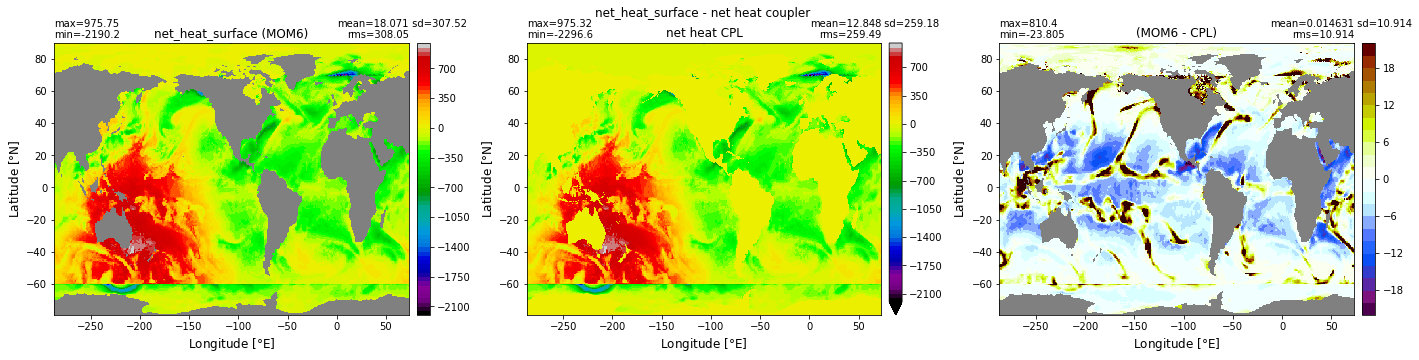

In [37]:
%matplotlib inline

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24,5))
ax1 = ax.flatten()
plt.suptitle('net_heat_surface - net heat coupler')
xyplot(net_heat_surface, grd.geolon, grd.geolat, grd.area_t, title='net_heat_surface (MOM6)', 
       axis=ax1[0], nbins=100, colormap=plt.cm.nipy_spectral, clim=(-2200,1000))
xyplot(net_heat_coupler_cpl, grd.geolon, grd.geolat, grd.area_t, title='net heat CPL', 
       axis=ax1[1], nbins=100, colormap=plt.cm.nipy_spectral, clim=(-2200,1000))
xyplot(net_heat_surface - net_heat_coupler_cpl, grd.geolon, grd.geolat, grd.area_t, 
       title='(MOM6 - CPL)', 
       axis=ax1[2])

### self-consistency in MOM6

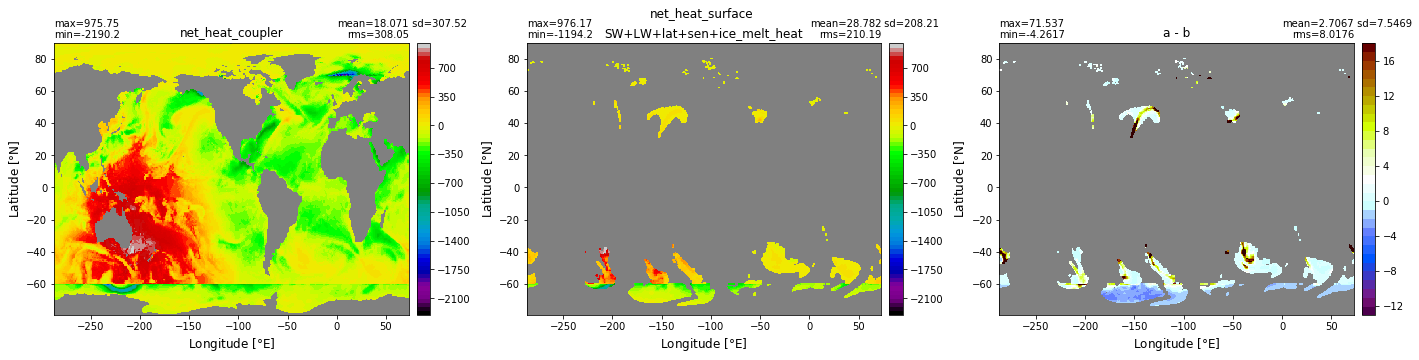

In [42]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24,5))
ax1 = ax.flatten()
plt.suptitle('net_heat_surface')
net_heat_surface2 = net_heat_coupler_mom1 + heat_content_cond + heat_content_evap + \
                    heat_content_fprec + heat_content_frunoff + heat_content_icemelt + \
                    heat_content_lprec + heat_content_lrunoff + 
xyplot(net_heat_surface, grd.geolon, grd.geolat, grd.area_t, title='net_heat_coupler', 
       axis=ax1[0], nbins=100, colormap=plt.cm.nipy_spectral, clim=(-2300,1000))
xyplot(net_heat_surface2, grd.geolon, grd.geolat, grd.area_t, title='SW+LW+lat+sen+ice_melt_heat', 
       axis=ax1[1], nbins=100, colormap=plt.cm.nipy_spectral, clim=(-2300,1000))
xyplot((net_heat_surface-net_heat_surface2), grd.geolon, grd.geolat, grd.area_t, title='a - b', 
       axis=ax1[2])

### The right approach?
The following is what I think we should be doing.

## Export

### SST

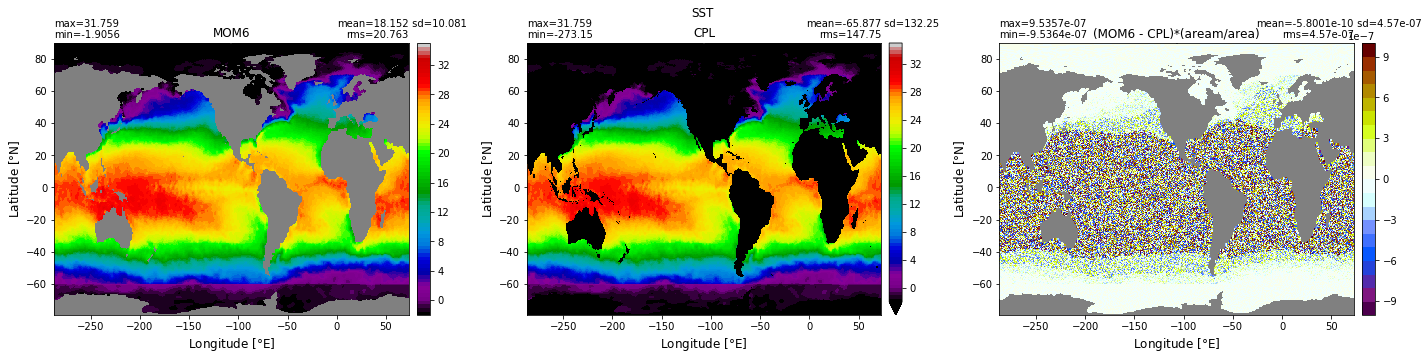

In [72]:
%matplotlib inline

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24,5))
ax1 = ax.flatten()
plt.suptitle('SST')
xyplot(sst_mom, grd.geolon, grd.geolat, grd.area_t, title='MOM6', 
       axis=ax1[0], nbins=100, colormap=plt.cm.nipy_spectral, clim=(-2,35))
xyplot(sst_cpl, grd.geolon, grd.geolat, grd.area_t, title='CPL', 
       axis=ax1[1], nbins=100, colormap=plt.cm.nipy_spectral, clim=(-2,35))
xyplot((sst_mom-sst_cpl), grd.geolon, grd.geolat, grd.area_t, title='(MOM6 - CPL)*(aream/area)', 
       axis=ax1[2])

### SSS

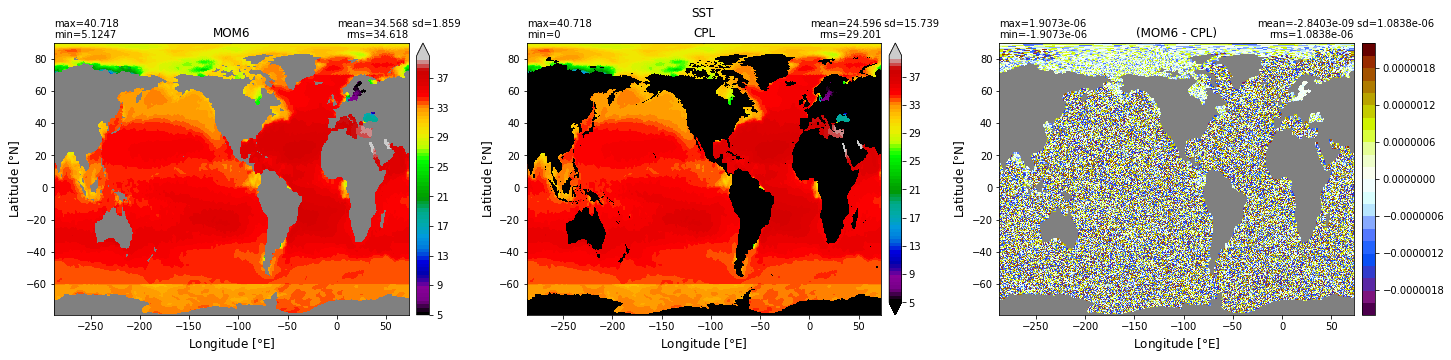

In [78]:
%matplotlib inline

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24,5))
ax1 = ax.flatten()
plt.suptitle('SST')
xyplot(sss_mom, grd.geolon, grd.geolat, grd.area_t, title='MOM6', 
       axis=ax1[0], nbins=100, colormap=plt.cm.nipy_spectral, clim=(5,40))
xyplot(sss_cpl, grd.geolon, grd.geolat, grd.area_t, title='CPL', 
       axis=ax1[1], nbins=100, colormap=plt.cm.nipy_spectral, clim=(5,40))
xyplot((sss_mom-sss_cpl), grd.geolon, grd.geolat, grd.area_t, title='(MOM6 - CPL)', 
       axis=ax1[2])